# HW10 - Spatial Data Analysis
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

## Import initial libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt

## Working with Shape File

### Loading Census Tract Shape File¶

In [2]:
from geopandas import GeoDataFrame
shape_path="ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

### Coordinate systems, projections, and transformations 

In [3]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

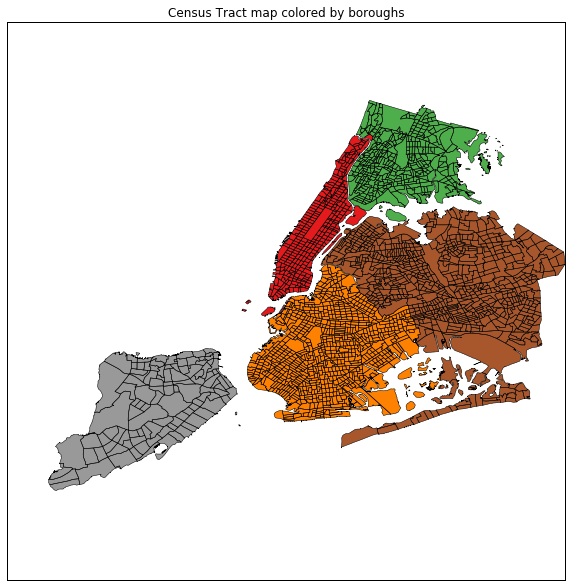

In [4]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

### Map NYC Population density

#### Load Census Data for 2010

In [5]:
ct_data=DataFrame.from_csv('ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)

#### Add popuation density to CT shapefile

In [6]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) #SE_T002_002 is population density in social explorer dataset

#### Vusualize the Population density for 2010

/opt/rh/anaconda/root/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


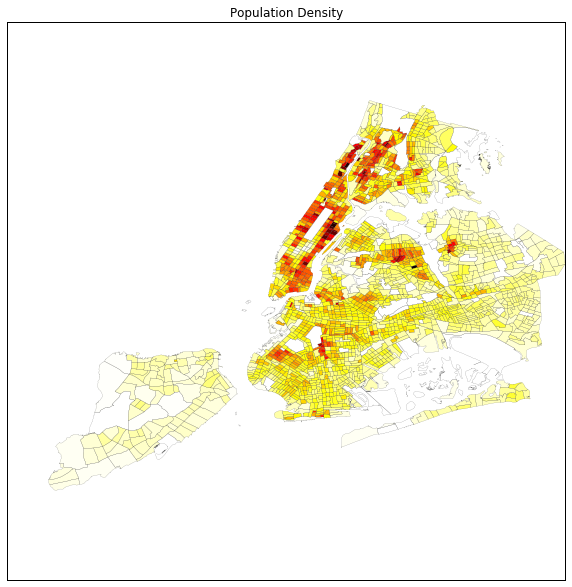

In [7]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Population Density")

## Explore CitiBike data

### Load CitiBike data

In [8]:
df_bike_monthly=DataFrame.from_csv('CitiBike_monthly_byStation.csv')
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


### Splitted data into two groups Winter (Dec-Feb) and Summer(Jun-Aug)

In [10]:
df_bike_monthly['Month'] = df_bike_monthly.index.month

In [11]:
summer_ride = df_bike_monthly[(df_bike_monthly['Month']>=6) & (df_bike_monthly['Month']<=8)]
summer_ride

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1534,1535,1536,1537,1538,1539,1540,1541,1542,Month
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,7
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,8
2014-06-30,2048,3306,9626,3515,7255,2942,1917,3702,3694,2422,...,0,0,0,0,0,0,0,0,0,6
2014-07-31,2252,3216,9825,3509,7014,3224,2195,3732,4042,2268,...,0,0,0,0,0,0,0,0,0,7
2014-08-31,2179,3004,10196,3573,7328,3311,2213,4078,4011,2168,...,0,0,0,0,0,0,0,0,0,8
2015-06-30,2309,0,9457,3426,5859,4763,1809,5190,2695,2116,...,0,0,0,0,0,0,0,0,0,6
2015-07-31,2556,3831,10341,3958,6424,5397,2185,5688,4846,2743,...,0,0,0,0,0,0,0,0,0,7
2015-08-31,2640,3799,11801,4288,7031,5417,2470,6306,4583,2838,...,0,0,0,0,0,0,0,0,0,8
2016-06-30,3399,7370,10130,4566,7420,5775,2429,6037,0,3054,...,0,0,7009,1109,665,2470,178,852,615,6


In [12]:
winter_ride = df_bike_monthly[(df_bike_monthly['Month']>=12) | (df_bike_monthly['Month']<=2)]
winter_ride

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1534,1535,1536,1537,1538,1539,1540,1541,1542,Month
starttime,,,,,,,,,,,,,,,,,,,,,
2013-12-31,1299,1650,4081,1686,3046,1575,830,1890,2048,1009,...,0,0,0,0,0,0,0,0,0,12
2014-01-31,956,1337,3178,1251,1920,1130,477,1412,1082,681,...,0,0,0,0,0,0,0,0,0,1
2014-02-28,650,960,2920,676,1808,933,508,1045,963,530,...,0,0,0,0,0,0,0,0,0,2
2014-12-31,1052,1304,4501,1783,2985,2091,779,2108,1636,878,...,0,0,0,0,0,0,0,0,0,12
2015-01-31,833,0,3186,1248,1992,1429,442,1499,1366,619,...,0,0,0,0,0,0,0,0,0,1
2015-02-28,562,0,2130,913,1363,1140,356,1023,891,447,...,0,0,0,0,0,0,0,0,0,2
2015-12-31,1873,2502,7101,2678,3968,3492,1420,3620,3251,1654,...,0,0,0,0,0,0,0,0,0,12
2016-01-31,1031,1669,4533,1847,2304,1943,656,2485,0,935,...,0,0,0,0,0,0,0,0,0,1
2016-02-29,1200,1951,4913,2088,2503,2224,859,2814,0,1082,...,0,0,0,0,0,0,0,0,0,2


### Time Series Aanalysis for Summer nd Winter

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

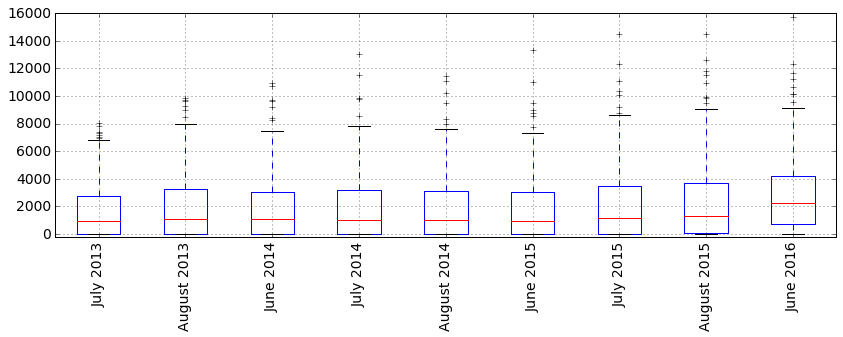

In [13]:
#Summer 
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_monthly_=summer_ride.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

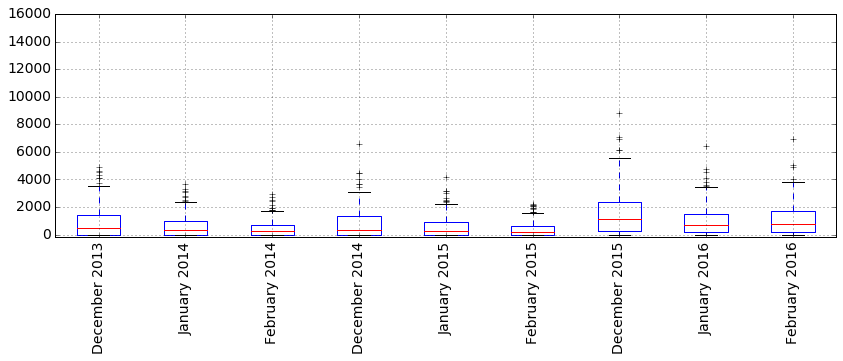

In [14]:
#Winter
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_monthly_=winter_ride.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

#### Seasonal Decomposition Summer aand Winter

/opt/rh/anaconda/root/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


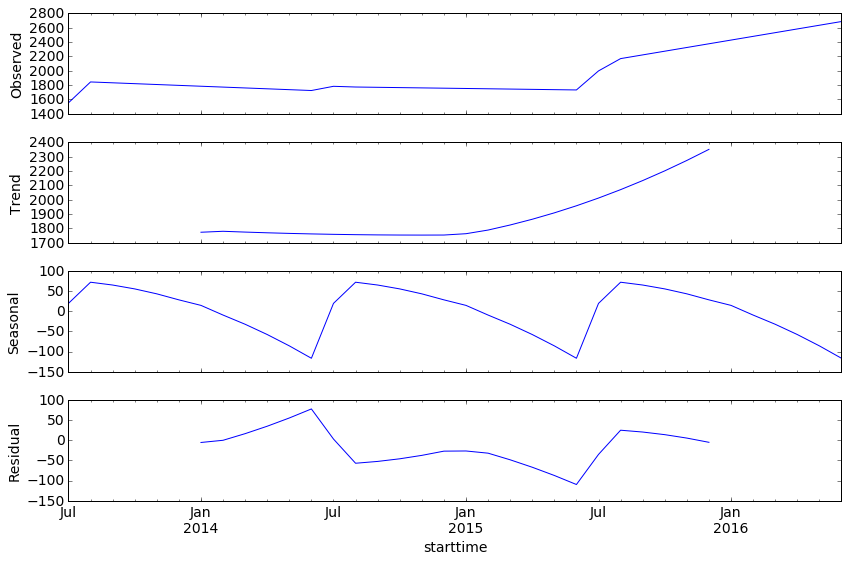

In [15]:
#Summer
import statsmodels.api as sm

#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=summer_ride.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize']=(12,8)
resplot = res.plot()

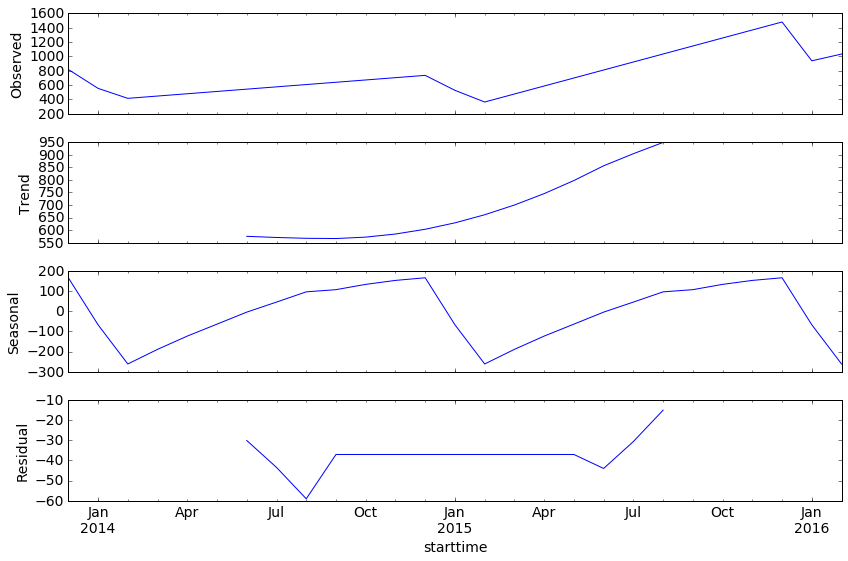

In [16]:
#Winter
#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=winter_ride.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize']=(12,8)
resplot = res.plot()

## Map CitiBike Data to CT level

### Load CitiBike station location data

In [17]:
station_id_summer=DataFrame.from_csv('Station_id.csv')
#convert station_ids to string index
station_id_summer.index=station_id_summer.index.astype(str)
station_id_summer.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


In [18]:
station_id_winter=DataFrame.from_csv('Station_id.csv')
#convert station_ids to string index
station_id_winter.index=station_id_winter.index.astype(str)
station_id_winter.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


### Create CitiBike station Geometry (Point) from Corrdinates (Lat & Lon)

In [19]:
import shapely
# combine lat and lon to one column
station_id_summer['lonlat']=zip(station_id_summer.lon,station_id_summer.lat)
# Create Point Geometry for based on lonlat column
station_id_summer['geometry']=station_id_summer[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id_summer.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


In [20]:
import shapely
# combine lat and lon to one column
station_id_winter['lonlat']=zip(station_id_winter.lon,station_id_winter.lat)
# Create Point Geometry for based on lonlat column
station_id_winter['geometry']=station_id_winter[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id_winter.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


### Intersect the two geometries

In [21]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id_summer)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id_summer.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id_summer))[:4],
station_id_summer['BoroCT2010']=a

% 100.


In [22]:
station_id_summer.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

In [23]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id_winter)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id_winter.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id_winter))[:4],
station_id_winter['BoroCT2010']=a

% 100.


In [24]:
station_id_winter.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add Monthly rides to the station GeoDataFrame with CT code

In [25]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id_summer['MonthlyAve_summer']=summer_ride.sum()

In [26]:
station_id_summer.head()

,lat,lon,lonlat,geometry,BoroCT2010,MonthlyAve_summer
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,22422
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,32869
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,87375
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,33018
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,59890


In [27]:
station_id_winter['MonthlyAve_winter']=winter_ride.sum()

In [28]:
station_id_winter.head()

,lat,lon,lonlat,geometry,BoroCT2010,MonthlyAve_winter
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,9456
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,11373
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,36543
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,14170
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,21889


### Add the monthly average rides to the CT shapefile Winter and Summer rides

In [29]:
# use the 
temp_summer=station_id_summer[['MonthlyAve_summer']]
temp_summer['station_id_summer']=station_id_summer.index
temp_summer.index=station_id_summer['BoroCT2010']
ct_shape_MonthlyAve_summer=ct_shape.join(temp_summer)
ct_shape_MonthlyAve_summer.fillna(0,inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


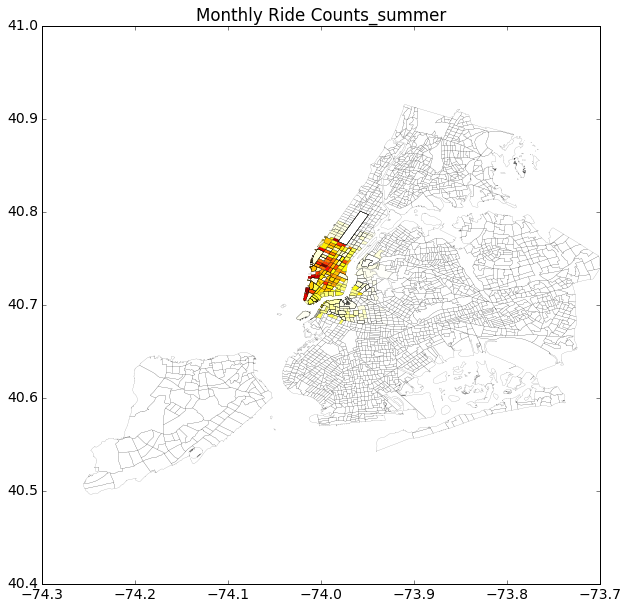

In [30]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve_summer.plot(column='MonthlyAve_summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts_summer")

In [31]:
temp_winter=station_id_winter[['MonthlyAve_winter']]
temp_winter['station_id_winter']=station_id_winter.index
temp_winter.index=station_id_winter['BoroCT2010']
ct_shape_MonthlyAve_winter=ct_shape.join(temp_winter)
ct_shape_MonthlyAve_winter.fillna(0,inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


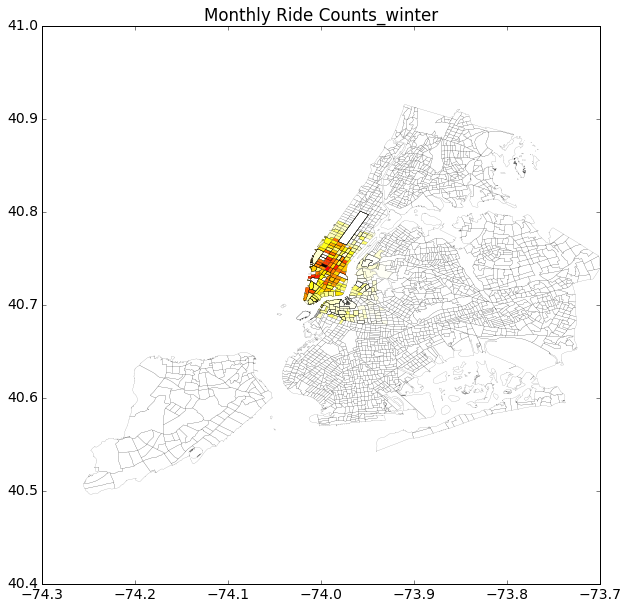

In [32]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve_winter.plot(column='MonthlyAve_winter',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts_winter")

### Removing the CTs that are out of zoom boundries

In [33]:
ct_shape_MonthlyAve_summer_Zoom=(ct_shape_MonthlyAve_summer[ct_shape_MonthlyAve_summer
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [35]:
print "Total number of CTs_summer:", len(ct_shape)
print "Number of zoomed CTs_summer:", len(temp_summer.MonthlyAve_summer)

 Total number of CTs_summer: 2166
Number of zoomed CTs_summer: 543


In [36]:
ct_shape_MonthlyAve_winter_Zoom=(ct_shape_MonthlyAve_winter[ct_shape_MonthlyAve_winter
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [37]:
print "Total number of CTs_winter:", len(ct_shape)
print "Number of zoomed CTs_winter:", len(temp_winter.MonthlyAve_winter)

Total number of CTs_winter: 2166
Number of zoomed CTs_winter: 543


### Map the monthly rides Winter and Summer zoomed

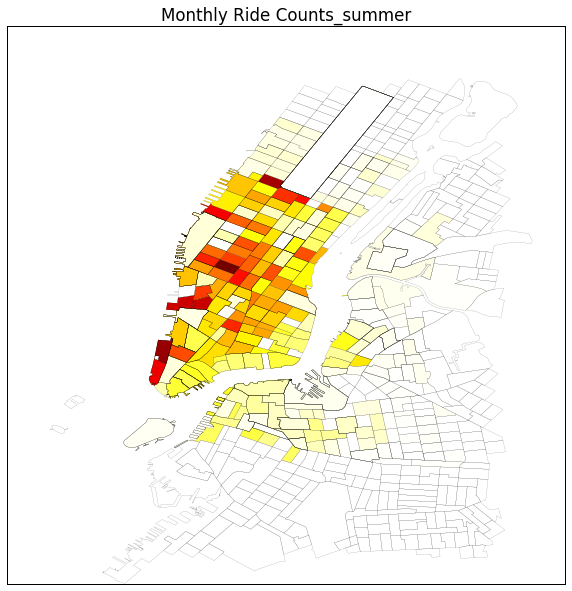

In [38]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_summer_Zoom.plot(column='MonthlyAve_summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts_summer")

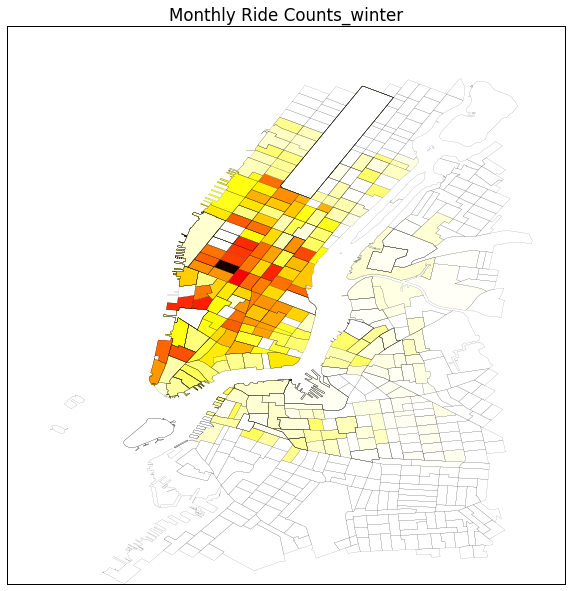

In [39]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_winter_Zoom.plot(column='MonthlyAve_winter',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts_winter")

### Export Shapefile CTs in the CitiBike Zone

In [42]:
path='ct_shape_MonthlyAve_Zoom.shp'
ct_shape_MonthlyAve_summer_Zoom.to_file(path)

## Exploratory Geospatial Analysis

In [43]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights

In [44]:
qW_CT=ps.queen_from_shapefile(path)

('Island id: ', [0])


#### Neighbors of index10

In [45]:
qW_CT[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [46]:
qW_CT.cardinalities[10]

9

#### Matrix of Weights

In [47]:
Wmatrix, ids = qW_CT.full()

In [48]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [49]:
qW_CT.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [50]:
MonthlyRide_summer=ct_shape_MonthlyAve_summer_Zoom.MonthlyAve_summer
MonthlyRideLag_summer=ps.lag_spatial(qW_CT, MonthlyRide_summer)

In [51]:
MonthlyRide_winter=ct_shape_MonthlyAve_winter_Zoom.MonthlyAve_winter
MonthlyRideLag_winter=ps.lag_spatial(qW_CT, MonthlyRide_winter)

#### Create Quantiles for maping

In [52]:
MonthlyRideLag_summerQ10 = ps.Quantiles(MonthlyRideLag_summer, k=10)
MonthlyRideLag_summerQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    49.286                 2
   49.286 < x[i] <=   882.900                78
  882.900 < x[i] <=  2346.833                80
 2346.833 < x[i] <=  5645.067                84
 5645.067 < x[i] <=  8593.933                75
 8593.933 < x[i] <= 19189.030                79
19189.030 < x[i] <= 27831.071                80
27831.071 < x[i] <= 32327.735                79
32327.735 < x[i] <= 49147.643                80

In [53]:
MonthlyRideLag_winterQ10 = ps.Quantiles(MonthlyRideLag_winter, k=10)
MonthlyRideLag_winterQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    36.286                 2
   36.286 < x[i] <=   603.729                78
  603.729 < x[i] <=  1458.923                80
 1458.923 < x[i] <=  2284.227                79
 2284.227 < x[i] <=  3278.714                80
 3278.714 < x[i] <=  7763.237                79
 7763.237 < x[i] <= 10456.870                80
10456.870 < x[i] <= 12783.385                79
12783.385 < x[i] <= 20551.286                80

#### Map the monthly rides lag

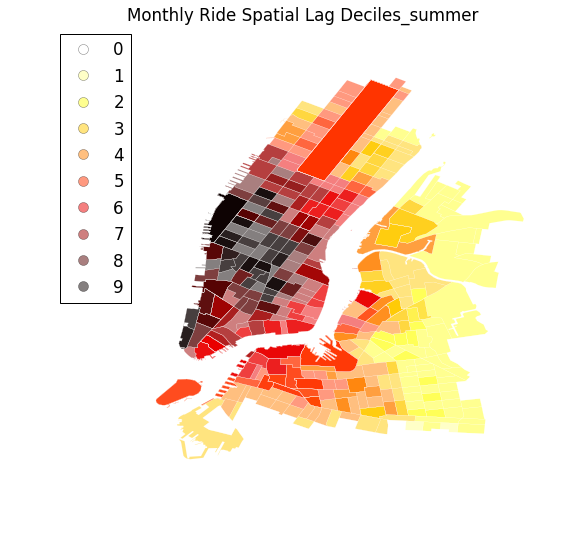

In [55]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_summer_Zoom.assign(cl=MonthlyRideLag_summerQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Monthly Ride Spatial Lag Deciles_summer")


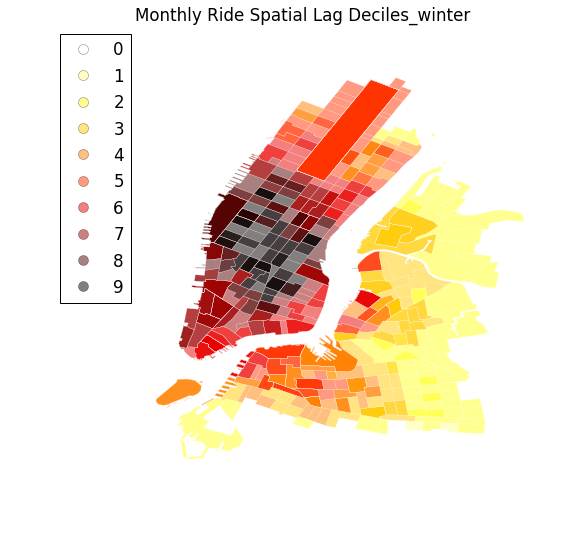

In [56]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_winter_Zoom.assign(cl=MonthlyRideLag_winterQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Monthly Ride Spatial Lag Deciles_winter")

## Global  Spatial Autocorrelation Winter and Summer rides

In [57]:
b_summer,a_summer = np.polyfit(MonthlyRide_summer, MonthlyRideLag_summer, 1)
b_summer,a_summer

(0.64335490815356511, 4220.5552980795601)

In [58]:
b_winter,a_winter = np.polyfit(MonthlyRide_winter, MonthlyRideLag_winter, 1)
b_winter,a_winter

(0.66023249858156818, 1600.8324238675889)

### Moran Scatterplot

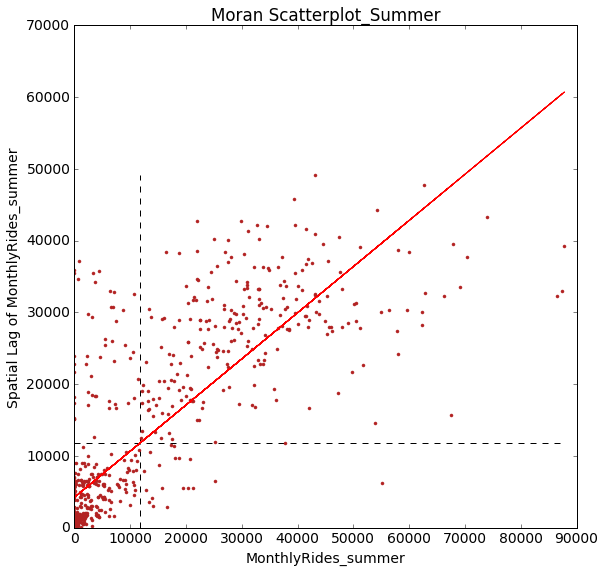

In [59]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide_summer, MonthlyRideLag_summer, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_summer.mean(), MonthlyRideLag_summer.min(), MonthlyRideLag_summer.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_summer.mean(), MonthlyRide_summer.min(), MonthlyRide_summer.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_summer, a_summer + b_summer*MonthlyRide_summer, 'r')
plt.title('Moran Scatterplot_Summer')
plt.ylabel('Spatial Lag of MonthlyRides_summer')
plt.xlabel('MonthlyRides_summer')

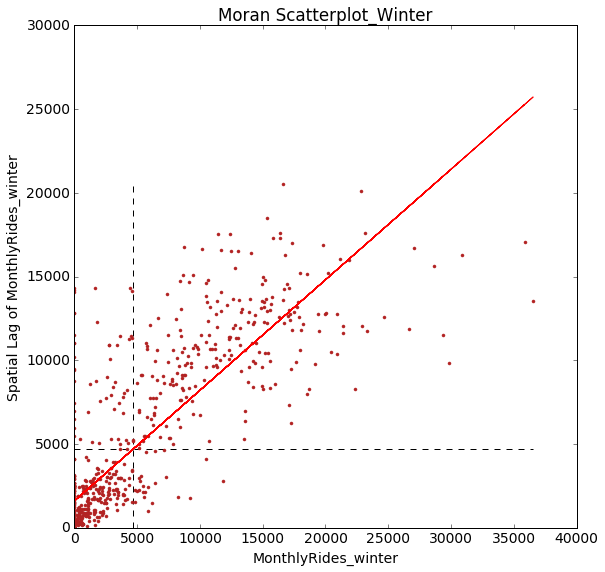

In [60]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide_winter, MonthlyRideLag_winter, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_winter.mean(), MonthlyRideLag_winter.min(), MonthlyRideLag_winter.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_winter.mean(), MonthlyRide_winter.min(), MonthlyRide_winter.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_winter, a_winter + b_winter*MonthlyRide_winter, 'r')
plt.title('Moran Scatterplot_Winter')
plt.ylabel('Spatial Lag of MonthlyRides_winter')
plt.xlabel('MonthlyRides_winter')

### Moran's I

In [61]:
I_MonthlyRide_summer = ps.Moran(MonthlyRide_summer, qW_CT)

In [62]:
I_MonthlyRide_summer.I, I_MonthlyRide_summer.p_sim

(0.64353398667011008, 0.001)

Thus, the $I$ statistic for summer rides is $0.643$ for this data, and has a very small $p$ value. 

In [63]:
I_MonthlyRide_summer.sim[0:10]

array([ 0.01178541, -0.02177065, -0.00807993, -0.00164781, -0.00547333,
       -0.02669387, -0.02009165, -0.01205263,  0.00543665,  0.01141605])

In [64]:
I_MonthlyRide_winter = ps.Moran(MonthlyRide_winter, qW_CT)

In [65]:
I_MonthlyRide_winter.I, I_MonthlyRide_winter.p_sim

(0.66039156431885593, 0.001)

Thus, the $I$ statistic for winter rides is $0.660$ for this data, and has a very small $p$ value.

In [66]:
I_MonthlyRide_winter.sim[0:10]

array([-0.00714576, -0.01428514, -0.03425046, -0.01995807,  0.00750991,
        0.01783752,  0.01890172,  0.01073886, -0.01745933, -0.01715468])

### KDEplot of all of the simulated points
the vertical line shows the observed value

In [67]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

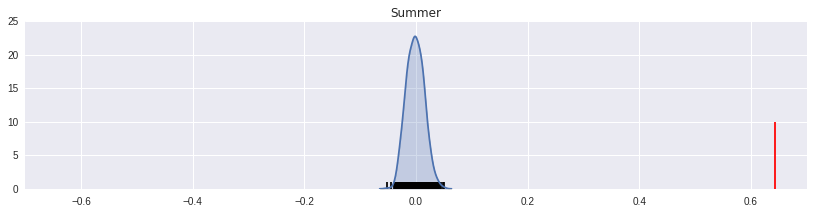

In [68]:
sns.kdeplot(I_MonthlyRide_summer.sim, shade=True)
plt.vlines(I_MonthlyRide_summer.sim, 0, 1)
plt.vlines(I_MonthlyRide_summer.I, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.title('Summer')

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

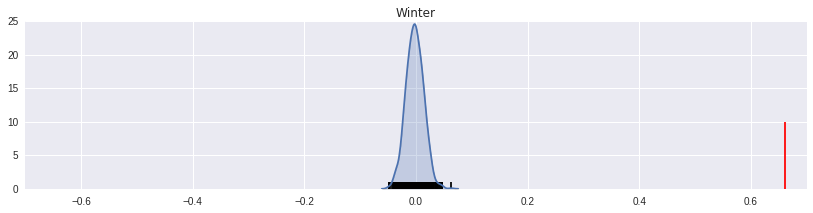

In [69]:
sns.kdeplot(I_MonthlyRide_winter.sim, shade=True)
plt.vlines(I_MonthlyRide_winter.sim, 0, 1)
plt.vlines(I_MonthlyRide_winter.I, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.title('Winter')

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

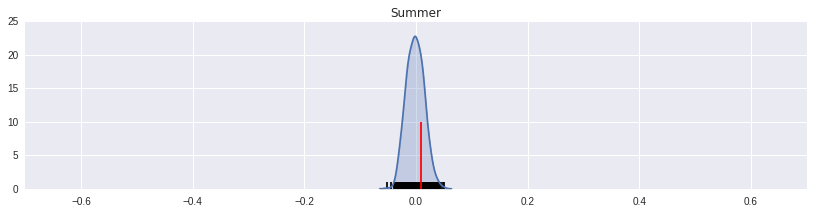

In [70]:
sns.kdeplot(I_MonthlyRide_summer.sim, shade=True)
plt.vlines(I_MonthlyRide_summer.sim, 0, 1)
plt.vlines(I_MonthlyRide_summer.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.title('Summer')

In the following figure the vertical line is showing when I statistic is close to our expected value

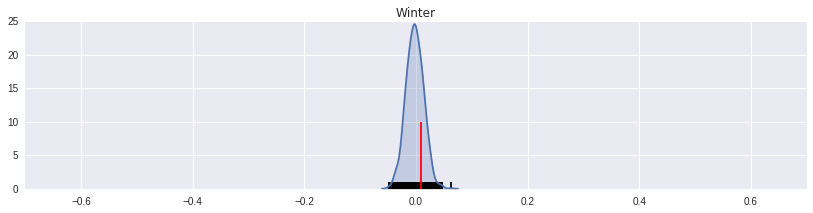

In [71]:
sns.kdeplot(I_MonthlyRide_winter.sim, shade=True)
plt.vlines(I_MonthlyRide_winter.sim, 0, 1)
plt.vlines(I_MonthlyRide_winter.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.title('Winter')

In the following figure the vertical line is showing when I statistic is close to our expected value

## Local  Spatial Autocorrelation

In [72]:
LMo_MonthlyRide_summer = ps.Moran_Local(MonthlyRide_summer, qW_CT,permutations=999)

In [73]:
LMo_MonthlyRide_summer.Is[0:5], LMo_MonthlyRide_summer.p_sim[0:5]

(array([-0.        , -0.2391325 ,  0.01474643,  0.00173718,  0.02473794]),
 array([ 0.001,  0.183,  0.367,  0.323,  0.383]))

In [74]:
LMo_MonthlyRide_winter = ps.Moran_Local(MonthlyRide_winter, qW_CT,permutations=999)

In [75]:
LMo_MonthlyRide_winter.Is[0:5], LMo_MonthlyRide_winter.p_sim[0:5]

(array([ -0.00000000e+00,  -3.14119985e-01,  -1.93084894e-04,
         -4.03594530e-03,  -7.97531288e-02]),
 array([ 0.001,  0.136,  0.486,  0.464,  0.408]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [76]:
sigs = MonthlyRide_winter[LMo_MonthlyRide_winter.p_sim <= .001]
W_sigs = MonthlyRideLag_winter[LMo_MonthlyRide_winter.p_sim <= .001]
insigs = MonthlyRide_winter[LMo_MonthlyRide_winter.p_sim > .001]
W_insigs = MonthlyRideLag_winter[LMo_MonthlyRide_winter.p_sim > .001]

In [77]:
sigs = MonthlyRide_summer[LMo_MonthlyRide_summer.p_sim <= .001]
W_sigs = MonthlyRideLag_summer[LMo_MonthlyRide_summer.p_sim <= .001]
insigs = MonthlyRide_summer[LMo_MonthlyRide_summer.p_sim > .001]
W_insigs = MonthlyRideLag_summer[LMo_MonthlyRide_summer.p_sim > .001]

### Plot Signficant LISA Winter and Summer rides

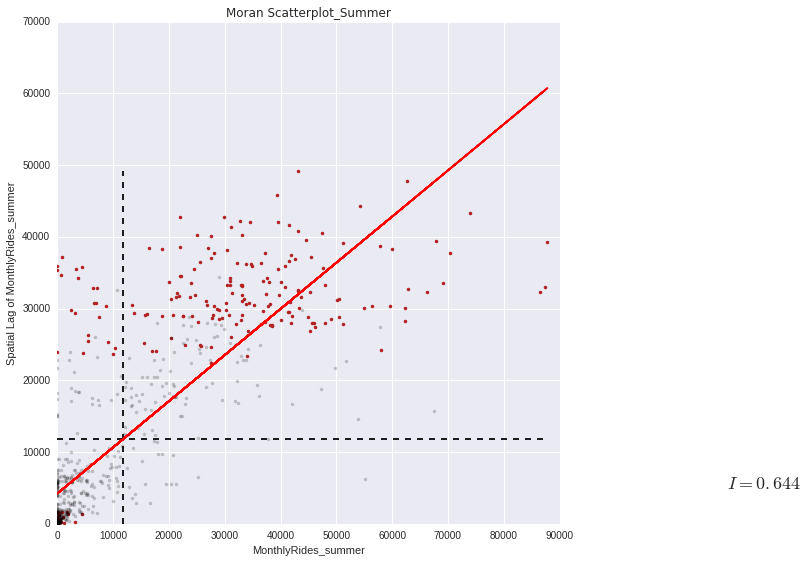

In [78]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide_summer.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_summer.mean(), MonthlyRideLag_summer.min(), MonthlyRideLag_summer.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_summer.mean(), MonthlyRide_summer.min(), MonthlyRide_summer.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_summer, a_summer + b_summer*MonthlyRide_summer, 'r')
plt.title('Moran Scatterplot_Summer')
plt.ylabel('Spatial Lag of MonthlyRides_summer')
plt.xlabel('MonthlyRides_summer')


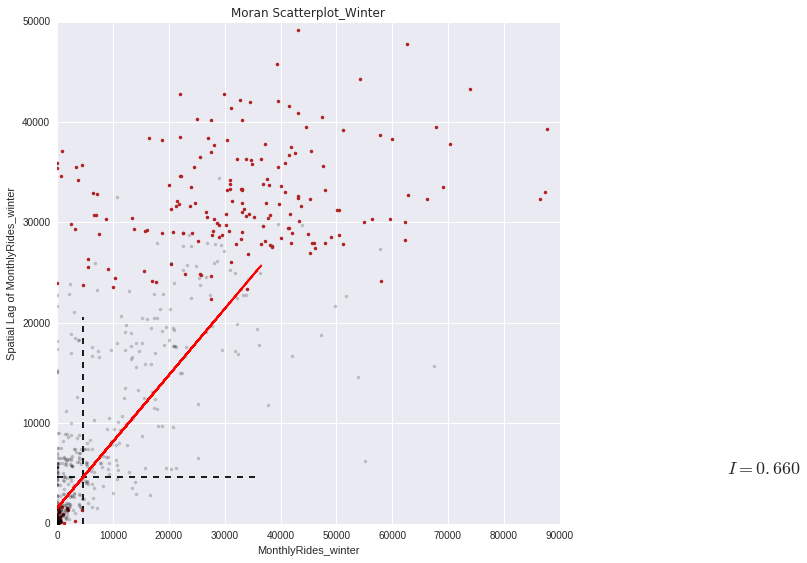

In [79]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide_winter.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_winter.mean(), MonthlyRideLag_winter.min(), MonthlyRideLag_winter.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_winter.mean(), MonthlyRide_winter.min(), MonthlyRide_winter.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_winter, a_winter + b_winter*MonthlyRide_winter, 'r')
plt.title('Moran Scatterplot_Winter')
plt.ylabel('Spatial Lag of MonthlyRides_winter')
plt.xlabel('MonthlyRides_winter')

### Hot and Cold spots Winter and Summer

In [82]:
sig = LMo_MonthlyRide_summer.p_sim < 0.01
hotspots_summer = LMo_MonthlyRide_summer.q==1 * sig
coldspots_summer = LMo_MonthlyRide_summer.q==3 * sig
print "Number of Hotspots_summer:", hotspots_summer.sum()
print "Number of Coldspots_summer:", coldspots_summer.sum()

Number of Hotspots_summer: 190
Number of Coldspots_summer: 242


In [83]:
sig = LMo_MonthlyRide_winter.p_sim < 0.01
hotspots_winter = LMo_MonthlyRide_winter.q==1 * sig
coldspots_winter = LMo_MonthlyRide_winter.q==3 * sig
print "Number of Hotspots_winter:", hotspots_winter.sum()
print "Number of Coldspots_winter:", coldspots_winter.sum()

Number of Hotspots_winter: 193
Number of Coldspots_winter: 211


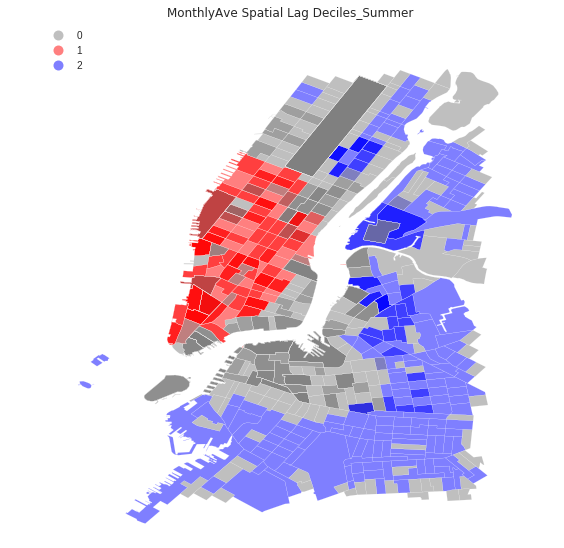

In [84]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots_summer*1 + coldspots_summer*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_summer_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("MonthlyAve Spatial Lag Deciles_Summer")

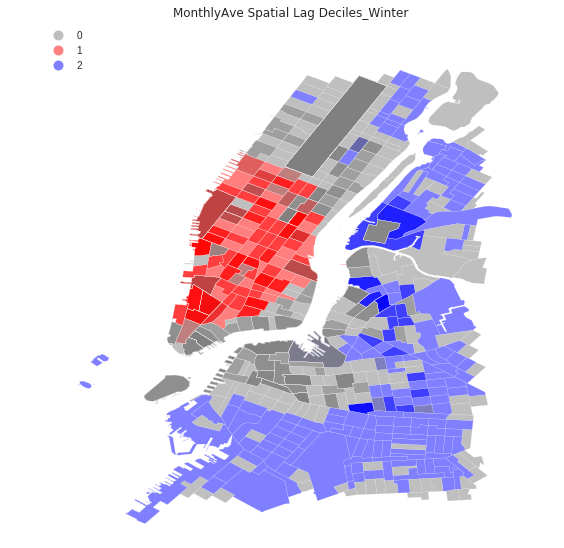

In [85]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots_winter*1 + coldspots_winter*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_winter_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("MonthlyAve Spatial Lag Deciles_Winter")